In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from dateutil.parser import parse
import numpy as np
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [2]:
events = pd.read_csv('data/events.csv')
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
events.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838.0,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3885.0,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4311.0,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [4]:
events.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

1. Analizar cuál es el tipo de evento predominante en el set de datos. 
2. Calcular el Top 5 de productos (identificados por sku) con mayor cantidad de conversiones.
3. Calcular el Top 5 de dispositivos más visitados dentro de la categoría Smartphones.
4. Averiguar cuáles son los 10 usuarios que registraron más actividad en la plataforma (es decir, realizaron más eventos).

In [5]:
#1 eventos predominantes
pred_event = events.loc[:, ['event']]
pred_event= pred_event.groupby('event').size() 
pred_event = pred_event.reset_index()
pred_event.rename({
    0:'count'
}, axis=1, inplace=True)
pred_event.sort_values(by='count', ascending=False, inplace=True)
pred_event.head()

,event,count
9,viewed product,528931
1,brand listing,98635
10,visited site,87378
0,ad campaign hit,82827
4,generic listing,67534


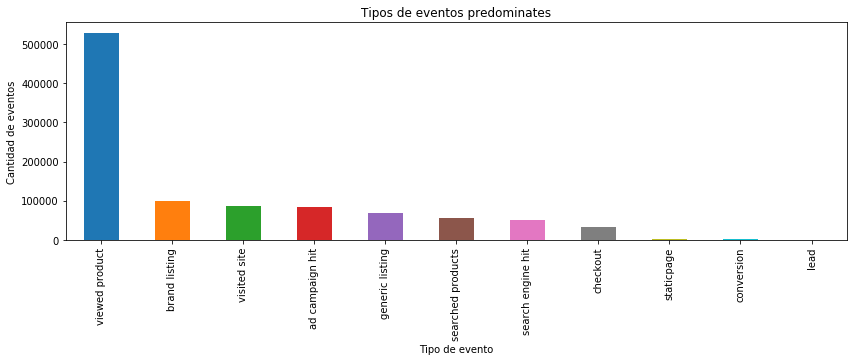

In [87]:
plot_event = pred_event.plot(x='event', y='count', title = "Tipos de eventos predominates",kind='bar',figsize=(14,4))
plot_event.set_ylabel('Cantidad de eventos')
plot_event.set_xlabel('Tipo de evento')
plot_event.legend().set_visible(False)
plt.show()

In [55]:
#3 Top5 device model donde device_type = Smartphone donde el evento sea viewed product
devices = events.loc[:,['event', 'model','device_type']]
devices = devices.loc[devices.event == 'viewed product']
#devices = devices.loc[devices.device_type == 'Smartphone']
devices = devices.loc[:,['model']]
devices = devices.groupby('model').size()
devices = devices.reset_index()
devices.rename({
    0:'count'
}, axis=1, inplace=True)
devices.sort_values(by='count', ascending=False, inplace=True)
devices.head()


,model,count
190,iPhone 6,47538
189,iPhone 5s,42045
192,iPhone 6S,36930
194,iPhone 7,26330
132,Samsung Galaxy S7 Edge,23062


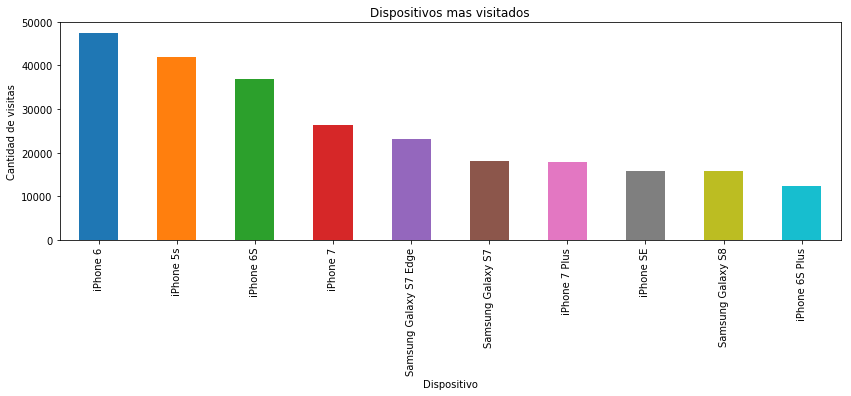

In [85]:
plot_device = devices.head(10)
plot_device = plot_device.plot(x='model', y='count', title = "Dispositivos mas visitados",kind='bar',figsize=(14,4))
plot_device.set_ylabel('Cantidad de visitas')
plot_device.set_xlabel('Dispositivo')
plot_device.legend().set_visible(False)
plt.show()